In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Airline_Delay_Cause.csv')

# Function for checking the missing values in the data


In [3]:
def check_missing_values(df):
    missing_values = df.isnull().sum()
    print("Missing values in each column:")
    print(missing_values)

In [4]:
values = check_missing_values(df)
print(values)

Missing values in each column:
year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            240
arr_del15              443
carrier_ct             240
weather_ct             240
nas_ct                 240
security_ct            240
late_aircraft_ct       240
arr_cancelled          240
arr_diverted           240
arr_delay              240
carrier_delay          240
weather_delay          240
nas_delay              240
security_delay         240
late_aircraft_delay    240
dtype: int64
None


# Now handling the missing values in the data. We will use the fillna() function to fill the missing values in the data. We can fill the missing values with the mean, median, or mode of the column. We can also fill the missing values with a specific value. In this case, we will fill the missing values with the mean of the column.

In [5]:
def fill_missing_values(df) -> pd.DataFrame:
    for col in df.columns:
        x = df[col]
        if x.dtype in ['int64', 'float64']:
            x.fillna(x.mean(), inplace=True)
        else:
            x.fillna(x.mode()[0], inplace=True)
    return df

In [6]:
filled = fill_missing_values(df)
print(check_missing_values(filled))

Missing values in each column:
year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64
None


In [19]:
def boxenplot(df):
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
    for col in numeric_cols:
        sns.boxenplot(x=df[col])
        plt.title(f"Boxplot for {col}")
        plt.show()

        

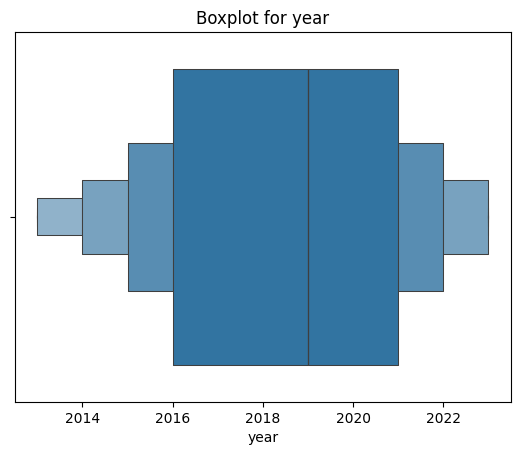

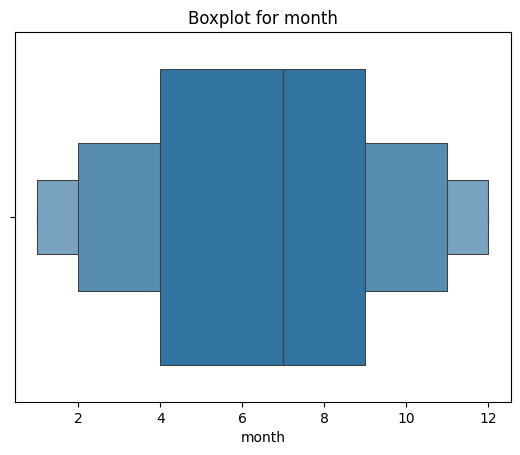

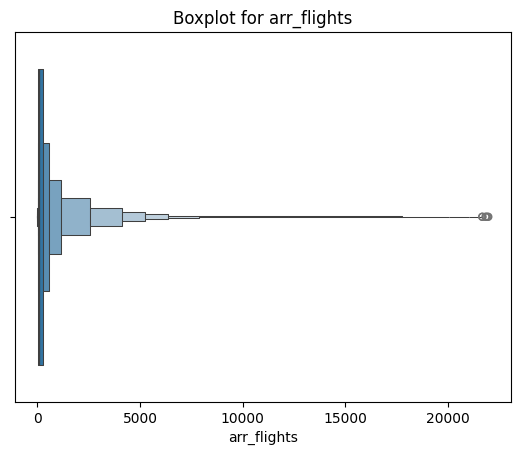

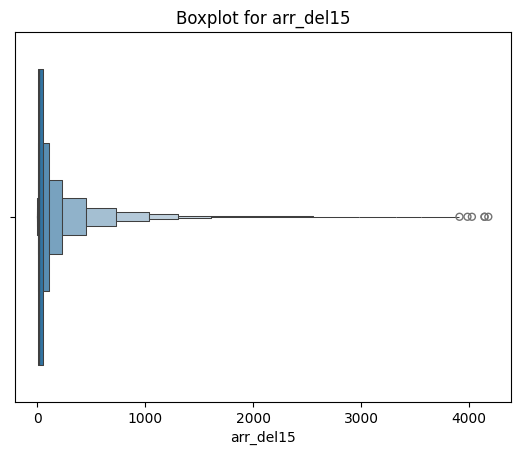

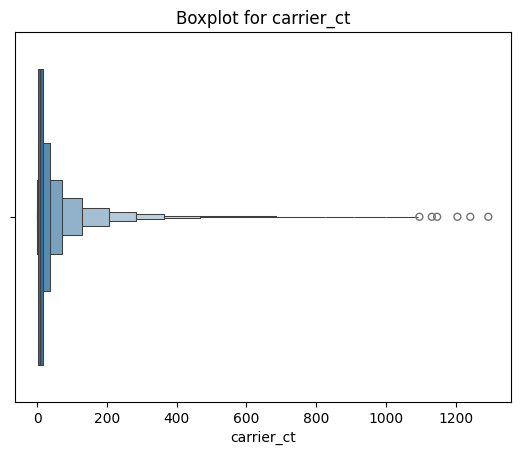

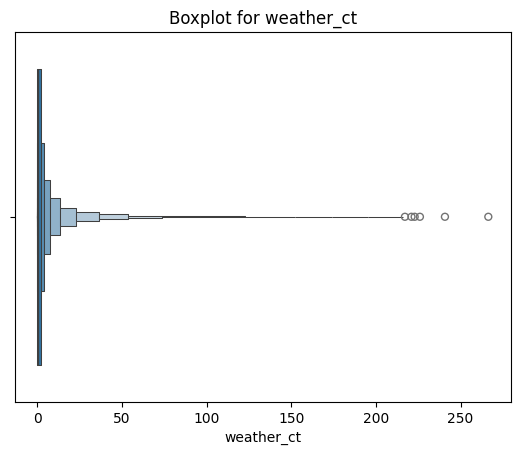

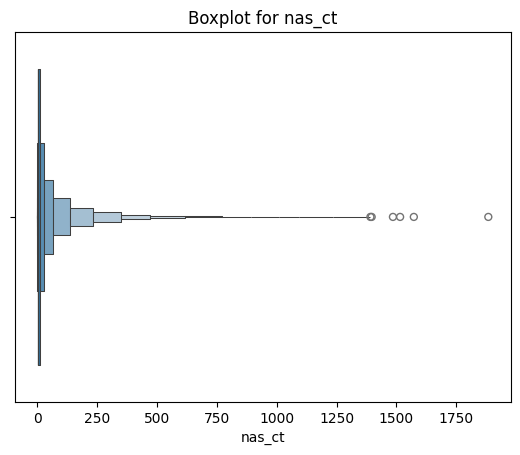

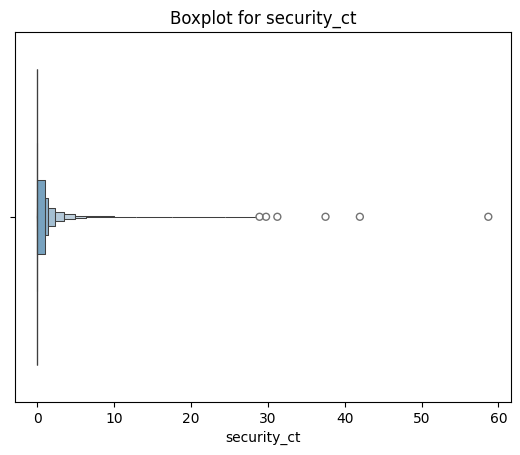

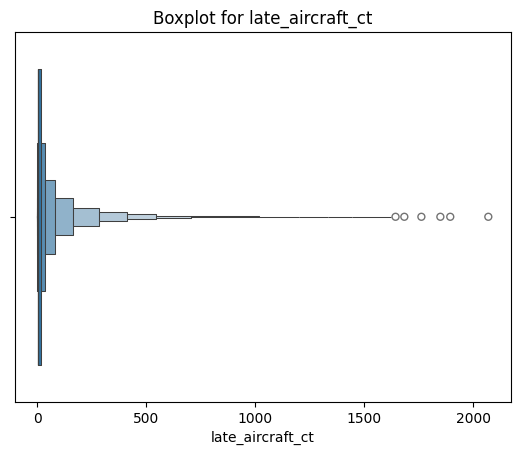

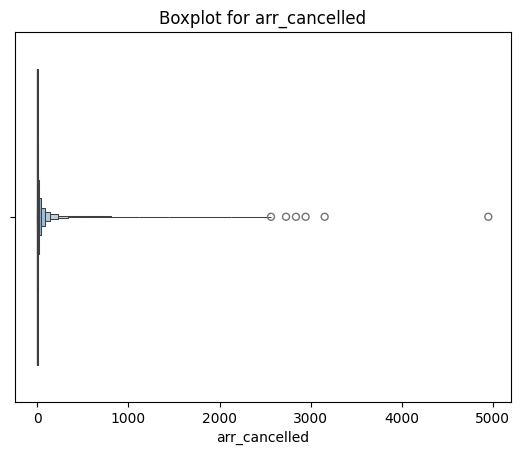

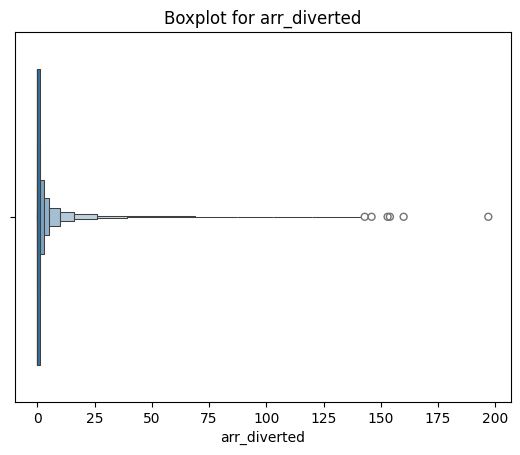

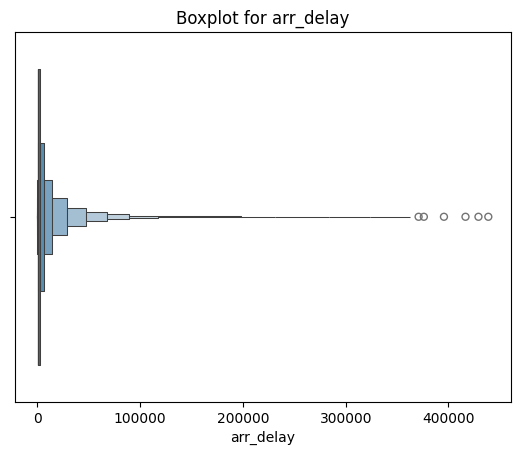

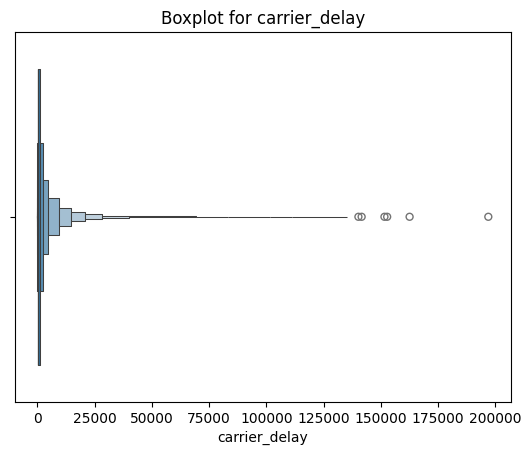

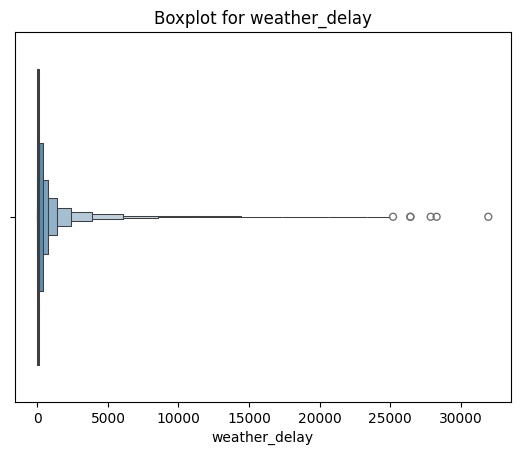

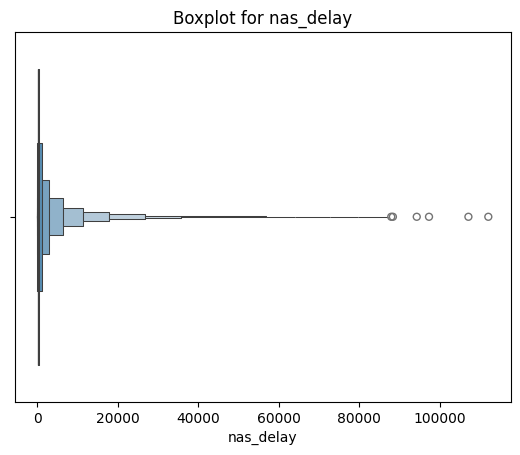

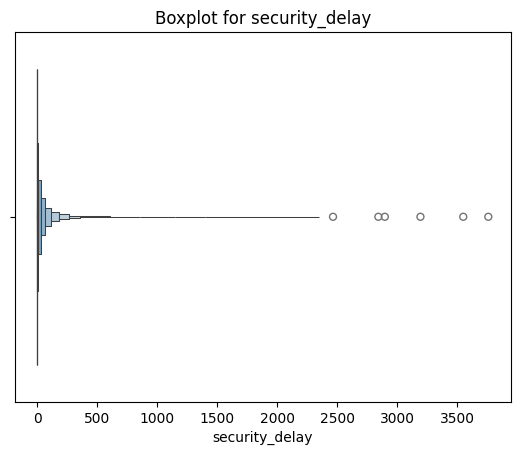

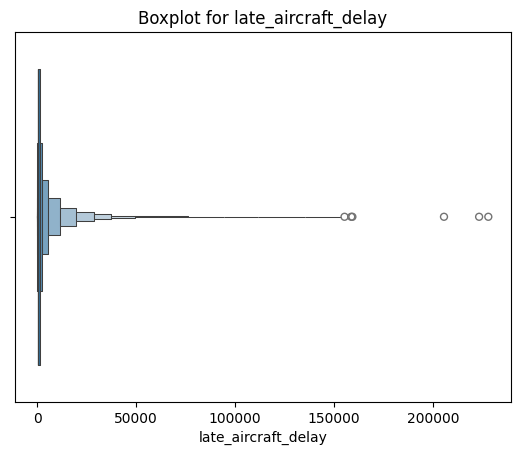

In [20]:
boxenplot(df)

In [17]:
def outliers_iqr(df: pd.DataFrame):
    before_df = df.copy()
    numeric_cols = before_df.select_dtypes(include=[np.number]).columns
    outlier_summary = []

    for col in numeric_cols:
        q1 = before_df[col].quantile(0.25)
        q3 = before_df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        before_count = ((before_df[col] < lower) | (before_df[col] > upper)).sum()
        before_df[col] = before_df[col].clip(lower=lower, upper=upper)
        after_count = ((before_df[col] < lower) | (before_df[col] > upper)).sum()

        if before_count > 0:
            outlier_summary.append({
                'column': col,
                'outliers_before': int(before_count),
                'outliers_after': int(after_count),
                'lower_bound': lower,
                'upper_bound': upper
            })

    summary_df = pd.DataFrame(outlier_summary).sort_values('outliers_before', ascending=False) if outlier_summary else pd.DataFrame()
    return before_df, summary_df

In [18]:
df_eda, outlier_report = outliers_iqr(df)
print('Outlier  summary:')
print((outlier_report))

Outlier  summary:
                 column  outliers_before  outliers_after  lower_bound  \
12            nas_delay            22295               0   -635.00000   
11        weather_delay            22171               0   -220.50000   
0           arr_flights            21570               0   -251.50000   
13       security_delay            21488               0      0.00000   
5           security_ct            21478               0      0.00000   
4                nas_ct            21368               0    -15.16625   
6      late_aircraft_ct            21313               0    -19.92500   
14  late_aircraft_delay            21276               0  -1450.50000   
9             arr_delay            21022               0  -3511.00000   
1             arr_del15            20617               0    -57.00000   
7         arr_cancelled            20554               0     -6.00000   
2            carrier_ct            19794               0    -20.64000   
10        carrier_delay          

In [ ]:
boxenplot(df_eda)

In [ ]:
#Now we have to handle the outliers in the dataset. We can use the IQR method to identify and handle outliers.
